# ultralytics Inference Sandbox

model: https://hub.ultralytics.com/models/1xKPEuwRoyDdwL6uamBI?tab=deploy

In [1]:
from bluer_sandbox import notebooks

import os
import json
import requests
from IPython.display import Image

from bluer_options import string
from bluer_objects import objects, storage

from vancouver_watching.host import signature
from vancouver_watching import env
from vancouver_watching.logger import logger

logger.info(f"{'.'.join(signature())},\nbuilt on {string.pretty_date()}")

🌈  vancouver_watching-4.9.1.bluer_ai-12.136.1.bluer_objects-6.96.1.bluer_options-5.86.1.torch-2.2.2.Python 3.12.9.Darwin 23.6.0..Jupyter-Notebook,
built on 23 April 2025, 16:05:25


In [2]:
object_name = "vanwatch-test-object-v2"
filename = "Victoria41East.jpg"

object_path = objects.object_path(object_name)

In [3]:
assert storage.download(object_name, filename)

🌀  bluer_objects.host.functions.shell(unzip -o "/Users/kamangir/storage/abcli/vanwatch-test-object-v2.zip" -d "/Users/kamangir/storage/abcli/vanwatch-test-object-v2")
🌀  WebDAVzipInterface.download vanwatch-test-object-v2


Archive:  /Users/kamangir/storage/abcli/vanwatch-test-object-v2.zip
  inflating: /Users/kamangir/storage/abcli/vanwatch-test-object-v2/test.gif  
  inflating: /Users/kamangir/storage/abcli/vanwatch-test-object-v2/vancouver-902p0k0ntw06ba7l.geojson  
  inflating: /Users/kamangir/storage/abcli/vanwatch-test-object-v2/clark1east.jpg  
  inflating: /Users/kamangir/storage/abcli/vanwatch-test-object-v2/vancouver.json  
  inflating: /Users/kamangir/storage/abcli/vanwatch-test-object-v2/vancouver-0qz1cm2tculuxgoc.json  
  inflating: /Users/kamangir/storage/abcli/vanwatch-test-object-v2/Victoria41East.jpg  
  inflating: /Users/kamangir/storage/abcli/vanwatch-test-object-v2/vancouver-5492l1cgubarck2m.json  
  inflating: /Users/kamangir/storage/abcli/vanwatch-test-object-v2/vancouver-aeyj8aqc8avqfa9a.geojson  
  inflating: /Users/kamangir/storage/abcli/vanwatch-test-object-v2/vancouver.geojson  
  inflating: /Users/kamangir/storage/abcli/vanwatch-test-object-v2/vanwatch-test-object-v2  
  inflat

---

In [4]:
# https://hub.ultralytics.com/models/<model-id>?tab=preview

# model_id = "R6nMlK6kQjSsQ76MPqQM" # default, YOLOv8x (heaviest)

model_id = "1xKPEuwRoyDdwL6uamBI" # YOLOv8n (lightest)

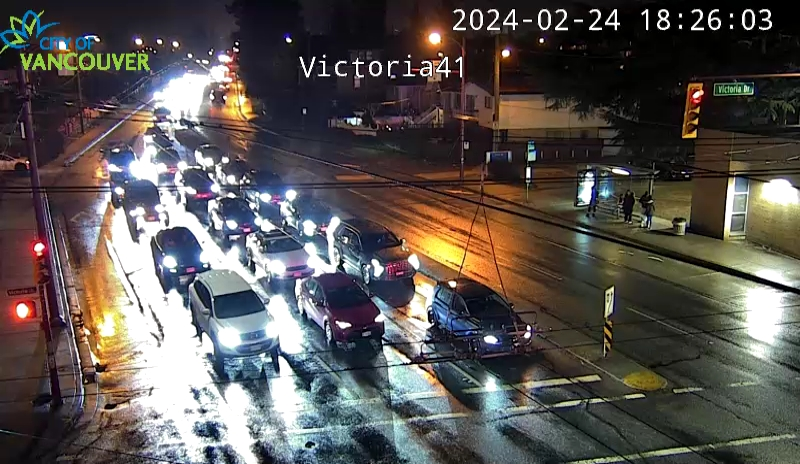

In [5]:
image_filename = os.path.join(object_path, filename)
Image(image_filename)

In [6]:
# https://hub.ultralytics.com/models/1xKPEuwRoyDdwL6uamBI?tab=deploy
url = "https://api.ultralytics.com/v1/predict/R6nMlK6kQjSsQ76MPqQM"
headers = {"x-api-key": env.ULTRALYTICS_API_KEY}
data = {"size": 640, "confidence": 0.25, "iou": 0.45}
with open(image_filename, "rb") as f:
	response = requests.post(url, headers=headers, data=data, files={"image": f})

# Check for successful response
response.raise_for_status()

# Print inference results
print(json.dumps(response.json(), indent=2))

{
  "images": [
    {
      "results": [
        {
          "box": {
            "x1": 186.9437,
            "x2": 281.41422,
            "y1": 268.27023,
            "y2": 378.80341
          },
          "class": 2,
          "confidence": 0.88427,
          "name": "car"
        },
        {
          "box": {
            "x1": 425.47394,
            "x2": 534.36639,
            "y1": 277.2084,
            "y2": 357.76764
          },
          "class": 2,
          "confidence": 0.88134,
          "name": "car"
        },
        {
          "box": {
            "x1": 294.12692,
            "x2": 386.35669,
            "y1": 271.67517,
            "y2": 351.04712
          },
          "class": 2,
          "confidence": 0.86458,
          "name": "car"
        },
        {
          "box": {
            "x1": 149.70535,
            "x2": 211.88034,
            "y1": 226.00787,
            "y2": 294.02661
          },
          "class": 2,
          "confidence": 0.82401,
        

---

In [7]:
# END